In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Torch device management
import torch

if torch.cuda.is_available():
    torch.cuda.set_device(0)
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [3]:
import embedders

In [4]:
# Load cities dataset

original_dists = embedders.dataloaders.load_cities()
print(f"Dists have {len(original_dists)} elements")

Dists have 312 elements


In [22]:
# Specify signature - useful to re-initialize the manifold here
signature = [(1, 2)]
pm = embedders.manifolds.ProductManifold(signature=signature)
print(pm.name)

# Rescale distances
dists_rescaled = original_dists / original_dists.max()

# Get embedding
embedders.coordinate_learning.train_coords(
    pm,
    dists_rescaled,
    device=device,
    burn_in_iterations=200,
    training_iterations=200 * 9,
    learning_rate=1e-1,
    burn_in_learning_rate=1e-2,
    scale_factor_learning_rate=1e-1,
)

S_1.0^2


  0%|          | 0/2000 [00:00<?, ?it/s]

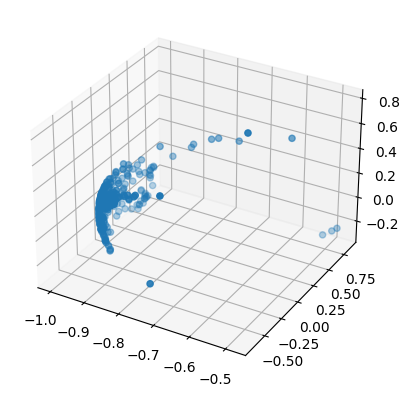

In [34]:
# Let's quickly plot these in 3-D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot x_embed, which is on a 2-sphere
x_embed = pm.x_embed.detach().cpu().numpy()
ax.scatter(x_embed[:, 0], x_embed[:, 1], x_embed[:, 2])